<a href="https://colab.research.google.com/github/jparkgit/ESAA-23-2/blob/main/Week9_HW2_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[과제함](https://cafe.naver.com/esaa2019?iframe_url_utf8=%2FArticleRead.nhn%253Fclubid%3D29858915%2526page%3D1%2526menuid%3D80%2526boardtype%3DL%2526articleid%3D2445%2526referrerAllArticles%3Dfalse)

기한: 11월 6일 (월) 18시 30분

과제: 파이썬 머신러닝 완벽가이드 ch5. 6\~7 pg. 319\~334 필사하여 깃허브에 업로드하고, 깃허브 링크를 댓글로 달아주세요.

# 5. 회귀
(목차)
1. 회귀 소개
2. 단순 선형 회귀를 통한 회귀 이해
3. 비용 최소화 - Gradient Descent
4. Scikitrun LinearRegression 을 이용한 보스턴 주택 가격 예측
5. 다항 회귀와 과(대)적합/과소적합 이해
---
6. 규제 선형 모델 - ridge, lasso, elasticnet
7. Logistic regression
8. 회귀 트리
9. 회귀 실습 - 자전거 대여 수요 예측
10. 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법
11. 정리

## 5.6 규제 선형 모델 - ridge, lasso, elasticnet

### 5.6.1 개요

### 5.6.2 Ridge

import Boston data

In [3]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 56.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=074f0198c24f4f3a0be4a2b9933f8e2cbe31e6b5d07b08d50ebb86b6ad8768e0
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
from ISLP import load_data

In [3]:
bostonDF = load_data("Boston")
bostonDF.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                    'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'PRICE']
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


create Y, X data

In [4]:
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

#alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0: .3f}' .format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.583 -25.997 -29.133 -71.25  -31.116]
5 folds의 개별 RMSE scores: [3.403 5.099 5.397 8.441 5.578]
5 folds의 평균 RMSE :  5.584


- LinearRegression의 RMSE 평균보다 더 뛰어난 예측 성능을 보여줌
- 평균 제곱근 오차(RMSE)는 회귀 예측 모델에 대한 두 개의 주요 성과 지표. 평균 제곱근 오차는 예측 모델에서 예측한 값과 실제 값 사이의 평균 차이를 측정. 예측 모델이 목표 값(정확도)을 얼마나 잘 예측할 수 있는지 추정.

릿지의 alpha값을 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴보기

In [9]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge = Ridge(alpha=alpha)

  #cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE: 5.773
alpha 0.1일 때 5 folds의 평균 RMSE: 5.745
alpha 1일 때 5 folds의 평균 RMSE: 5.659
alpha 10일 때 5 folds의 평균 RMSE: 5.584
alpha 100일 때 5 folds의 평균 RMSE: 5.442


- alpha가 100일 때 평균 RMSE가 가장 좋음

alpha의 값의 변화에 따른 피처의 회귀 계수값을 가로 막대 그래프로 시각화

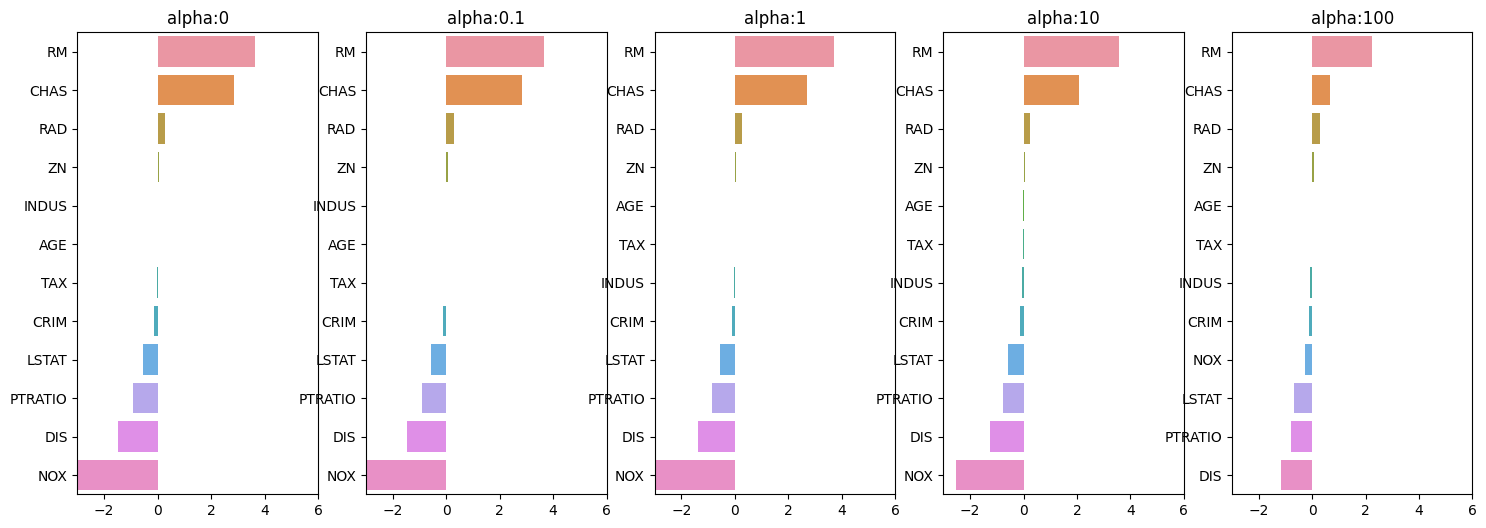

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 df생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)
  #alpha에 따른 피처별로 회귀 계수를 series로 변환하고 이를 df의 칼럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff
  #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수 값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

- alpha값을 계속 증가시킬 수록 회귀 계수 값을 지속적으로 작아짐

df에 저장된 alpha 값의 변화에 따른 릿지 회귀 계수 값

In [8]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.658119,3.666261,3.701399,3.558849,2.253651
CHAS,2.839993,2.823289,2.703836,2.071141,0.671761
RAD,0.289405,0.286615,0.271825,0.259375,0.295906
ZN,0.046963,0.047125,0.048055,0.050232,0.054831
INDUS,0.013468,0.008610,-0.017854,-0.054085,-0.062140
AGE,0.003611,0.002612,-0.002751,-0.008428,0.002979
TAX,-0.012682,-0.012775,-0.013305,-0.014453,-0.016313
CRIM,-0.121389,-0.120906,-0.118324,-0.115526,-0.115481
LSTAT,-0.552019,-0.553451,-0.562037,-0.589156,-0.685498
PTRATIO,-0.937533,-0.924764,-0.855687,-0.771284,-0.803480


### 5.6.3 Lasso

- W의 절댓값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용
- 사이킷런은 Lasso 클래스를 통해 라쏘 회귀 구현
- 파라미터: alpha

In [10]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 df로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print('####### ', model_name, '#######')
  for param in params:
    if model_name == 'Ridge':model = Ridge(alpha=param)
    elif model_name == 'Lasso':model = Lasso(alpha=param)
    elif model_name == 'ElasticNet':model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname='alpha:'+str(param)
    coeff_df[colname] = coeff

  return coeff_df

라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출

In [12]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.686 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.694 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.792 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.894 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.234 


반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 df 출력

In [13]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.632990,3.546455,2.355091,0.832446,0.000000
CHAS,1.595663,1.116519,0.000000,0.000000,0.000000
RAD,0.249808,0.253579,0.259166,0.250702,0.043064
ZN,0.049801,0.049953,0.050263,0.050046,0.037518
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.009482,-0.007813,0.005802,0.022662,0.042981
TAX,-0.014756,-0.015035,-0.015950,-0.015925,-0.009051
INDUS,-0.054631,-0.049131,-0.015646,-0.000000,-0.000000
CRIM,-0.112437,-0.112139,-0.096775,-0.074909,-0.000000
LSTAT,-0.591606,-0.599945,-0.685666,-0.787480,-0.824538


회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과가 남

### 5.6.4 ElasticNet

- L2 규제와 L1 규제를 결합한 회귀
- ElasticNet 클래스 사용
- 파라미터: alpha, l1_ratio

엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출

l1_ratio는 0.7로 고정

In [14]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n = X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.622 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.614 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.590 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.702 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.126 


In [15]:
# 반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 df 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.430244,3.276725,1.831157,0.880772,0.000000
CHAS,1.448952,1.084738,0.000000,0.000000,0.000000
RAD,0.258474,0.262816,0.282231,0.272363,0.133588
ZN,0.050762,0.051264,0.053269,0.052385,0.038418
AGE,-0.007826,-0.006138,0.009557,0.021816,0.044156
TAX,-0.014987,-0.015290,-0.016511,-0.016662,-0.011946
INDUS,-0.056076,-0.054291,-0.032292,-0.007016,-0.000000
CRIM,-0.113679,-0.113311,-0.102022,-0.085375,-0.028894
NOX,-0.310891,-0.000000,-0.000000,-0.000000,-0.000000
LSTAT,-0.604837,-0.617448,-0.718662,-0.781633,-0.815268


### 5.6.5 선형 회귀 모델을 위한 데이터 변환

- 피처와 타깃값 간에 선형의 관계가 있다고 가정하고, 최적의 선형함수를 찾아내 결과값을 예측
- 정규분포 형태를 매우 선호. (왜곡된 형태의 분포도 일 경우 예측 성능에 부정적 영향)
- 스케일링/정규화 과정 수행


- StandardSclaer 클래스; 평균 0 분산1 정규분포로 변환
- MinMaxScaler 클래스; 최솟값 0 최댓값 1 정규화
- 다항 특성을 적용하여 변환하는 방법
- log() 변환.
- ! 타깃값의 경우는 대체로 로그 변환을 적용

In [16]:
# method는 표준 정규 분포 변환Standard
# 최댓값/최솟값 정규화MinMax
# 로그변환Log 결정
# p-degree는 다항식 특성을 추가할 때 적용. p-degree는 2이상 부여하지 않음.

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [17]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그 변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = X_data)
    print('\n## 변환 유형 : {0}, Polynomial Degree : {1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose=False)


## 변환 유형 : None, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.745 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.659 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.584 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.442 

## 변환 유형 : Standard, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.771 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.755 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.488 

## 변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 7.579 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.645 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.405 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.621 

## 변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.724 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.506 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.840 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.655 

## 변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.733 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.330 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.335 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.696 

## 변환 유형 : Log, Polynomial Degree

데이터 값의 분포가 심하게 왜곡되어있을 경우엔 로그 변환 적용이 유리

## 5.7 Logisitic Regression

- 선형 회귀 방식을 분류에 적용한 알고리즘
- 회귀가 선형인가 아닌가는 weight 변수가 선형인지 아닌지를 따름
- 선형 회귀의 최적선을 찾는 것이 아니라 sigmoid 함수 최적선을 찾고
- 이 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류를 결정한다는 것.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardSclaer()로 평균이 0, 분산이 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

### LogisticRegression 클래스의 주요 하이퍼 파라미터: penalty(l1이면 L1규제, l2이면 L2규제), C(alpha의 역수)

accuracy : 0.977
roc_auc: 0.972


In [21]:
from sklearn.model_selection import GridSearchCV

params = {
    'penalty':['l2', 'l1'],
    'C': [0.01, 0.1, 1, 1, 5, 10]
}

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도0.975


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

로지스틱 회귀는 가볍고 빠르지만 이진 분류 예측 성능도 뛰어나서 이진 분류의 기본 모델로 사용하는 경우가 많다. 희소한 데이터 세트의 분류에도 뛰어난 성능을 보인다.